# Objetivos : 
## -> Encontrar o perfil das incorporados, empreiteiras e vendedoras que fizeram mais produziram.
## ->Definir os tipos de emprendimentos(quantidade de incorporadoras,de vendedoras e de construtoras, tipo de sistema financeiro,agente financiador)
## -> Criar um modelo de precificação para os empreendimentos e um modelo de precificação para os apartamentos

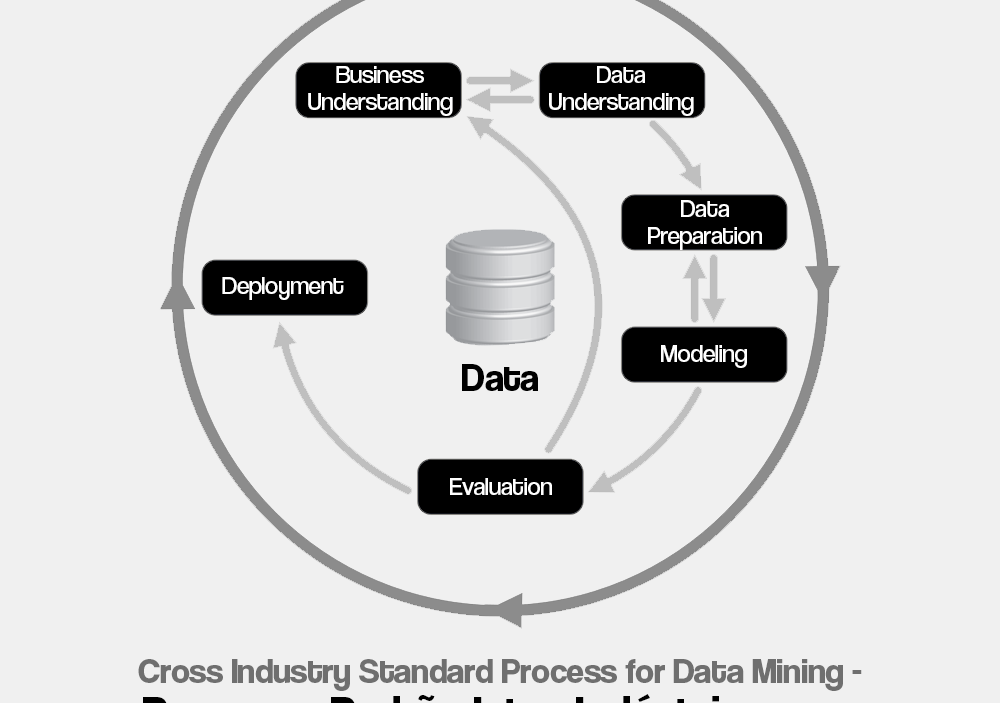

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from PIL import Image

In [83]:
#função para criar um df com a relação de empreendimentos por classe.
def cria_df(dataframe,column) :
    classes=df.groupby(column)[[column]].count()

    freq = classes[column].values
    classes= classes[column].index
    dic = {column:classes,'freq':freq}
    return dic
li = []
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()
    
def outliers(column,name_column):
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    ls = Q3+1.5*IQR
    num_outliers = df[column>ls][name_column].count()
    
    return ls, num_outliers

#Função para formatar a matriz de correlação
def plot_corr_matrix(corr_matrix, size=(14, 14)):
  # Set up the matplotlib figurea
  fig, ax = plt.subplots(figsize=size)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

    
    

In [84]:
#carregando os dados
df = pd.read_csv('LANRES_85_13_RMSP_CEM.csv',delimiter=";",low_memory=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          16935 non-null  int64 
 1   COD_EMP     16935 non-null  int64 
 2   TIPO_EMP    16935 non-null  object
 3   MES_LAN     16935 non-null  object
 4   ANO_LAN     16935 non-null  int64 
 5   DATA_ENT    16935 non-null  object
 6   DIST        13234 non-null  object
 7   SUBPREF     13234 non-null  object
 8   MUNICIPIO   16935 non-null  object
 9   ENDERECOCO  16935 non-null  object
 10  LOGRADOURO  16935 non-null  object
 11  TIT_VIA     4310 non-null   object
 12  TIPO_VIA    16929 non-null  object
 13  NUM         16935 non-null  object
 14  CEP         16913 non-null  object
 15  CEP_4DIG    16935 non-null  int64 
 16  NOME_EMP    16935 non-null  object
 17  ZONA        16935 non-null  object
 18  SETOR       16928 non-null  object
 19  QUADRA      16934 non-null  object
 20  LOTE  

# Data Preparation

In [85]:
#variáveis que serão deletadas
cols_to_remove = ['ID','COD_EMP','TIPO_EMP','MES_LAN','DATA_ENT','NUM','CEP_4DIG']

In [86]:
#encontrando as colunas com mais de 95% dos dados faltantes.
nans = df.isna().sum()
nans = nans[nans > 0]/len(df)
print(nans)

ax =['HOTELARIA','INCORPOR_B','INCORPOR_C','INCOPORADO','INCORPOR_D','INCORPOR_E','VENDEDORA2','VENDEDORA3','VENDEDORA4','VENDEDORA5','VENDEDORA6','CONSTRUT_B','CONSTRUT_C','CONSTRUT_D']
for i in ax:
    cols_to_remove.append(i)



DIST          0.218541
SUBPREF       0.218541
TIT_VIA       0.745497
TIPO_VIA      0.000354
CEP           0.001299
SETOR         0.000413
QUADRA        0.000059
LOTE          0.149336
AGENTE        0.475819
ENGENHEIRO    0.019486
ARQUITETO     0.087039
HOTELARIA     0.981340
INCORPOR_B    0.987836
INCORPOR_C    0.997520
INCOPORADO    0.999350
INCORPOR_D    0.999764
INCORPOR_E    0.999941
VENDEDORA2    0.880543
VENDEDORA3    0.977266
VENDEDORA4    0.996162
VENDEDORA5    0.999882
VENDEDORA6    0.999941
CONSTRUT_B    0.979746
CONSTRUT_C    0.997048
CONSTRUT_D    0.999882
RENRESP91     0.001299
PCMEDAU91     0.841453
PCMEDAU00     0.788663
PCMEDAU10     0.718866
dtype: float64


In [87]:
#trocando a ',' pelo '.' nas variáveis do tipo object 
var_num = ['AR_UT_UNID','AR_TT_UNID','AU_EMP','AT_EMP','PC_M2_AU','PC_M2_AT','PC_TT_ATU','PC_AU_ATU','PC_AT_ATU','PC_EMP_ATU','PC_TT_UN_U','PC_M2_AU_U','PC_M2_AT_U']

df['AR_UT_UNID'] = df['AR_UT_UNID'].str.replace(',', '.')
df['AR_TT_UNID'] = df['AR_TT_UNID'].str.replace(',', '.')
df['AT_EMP'] = df['AT_EMP'].str.replace(',', '.')
df['AU_EMP'] = df['AU_EMP'].str.replace(',', '.')
df['PC_M2_AU'] = df['PC_M2_AU'].str.replace(',', '.')
df['PC_M2_AT'] = df['PC_M2_AT'].str.replace(',', '.')
df['PC_TT_ATU'] = df['PC_TT_ATU'].str.replace(',', '.')
df['PC_AU_ATU'] = df['PC_AU_ATU'].str.replace(',', '.')
df['PC_AT_ATU'] = df['PC_AT_ATU'].str.replace(',', '.')
df['PC_EMP_ATU'] = df['PC_EMP_ATU'].str.replace(',', '.')
df['PC_TT_UN_U'] = df['PC_TT_UN_U'].str.replace(',', '.')
df['PC_M2_AU_U'] = df['PC_M2_AU_U'].str.replace(',', '.')
df['PC_M2_AT_U'] = df['PC_M2_AT_U'].str.replace(',', '.')

print(len(var_num))

13


In [88]:
#convertendo as variáves numéricas do tipo object no tipo float
df[var_num]=df[var_num].astype(float)

In [89]:
#variável target
target = "PC_AU_ATU"
#criação da coluna log('PC_M2_AU')
df['LogPC_AU_ATU'] = np.log(df['PC_AU_ATU'].values)
#Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(f'numerical vars({len(num_vars)}): {num_vars}')

#Variaveis categoricas
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

numerical vars(39): ['ID', 'COD_EMP', 'ANO_LAN', 'CEP_4DIG', 'DORM_UNID', 'BANH_UNID', 'GAR_UNID', 'ELEV', 'COB', 'BLOCOS', 'UNIDAND', 'ANDARES', 'AR_UT_UNID', 'AR_TT_UNID', 'AR_TT_TERR', 'TT_UNID', 'DORM_EMP', 'BANH_EMP', 'GAR_EMP', 'AU_EMP', 'AT_EMP', 'PC_TT_UN', 'PC_M2_AU', 'PC_M2_AT', 'PC_TT_ATU', 'PC_AU_ATU', 'PC_AT_ATU', 'PC_EMP_ATU', 'VLR_US__CO', 'PC_TT_UN_U', 'PC_M2_AU_U', 'PC_M2_AT_U', 'COOPERATIV', 'HOTEL', 'FLAT', 'EXFLAT', 'AP2010', 'SC_2010', 'LogPC_AU_ATU']
categorical vars(47): ['TIPO_EMP', 'MES_LAN', 'DATA_ENT', 'DIST', 'SUBPREF', 'MUNICIPIO', 'ENDERECOCO', 'LOGRADOURO', 'TIT_VIA', 'TIPO_VIA', 'NUM', 'CEP', 'NOME_EMP', 'ZONA', 'SETOR', 'QUADRA', 'LOTE', 'SIST_FINAN', 'AGENTE', 'INCORPORAD', 'VENDEDORA', 'CONSTRUTOR', 'ENGENHEIRO', 'ARQUITETO', 'HOTELARIA', 'INCORPOR_A', 'INCORPOR_B', 'INCORPOR_C', 'INCOPORADO', 'INCORPOR_D', 'INCORPOR_E', 'VENDEDOR_A', 'VENDEDORA2', 'VENDEDORA3', 'VENDEDORA4', 'VENDEDORA5', 'VENDEDORA6', 'CONSTRUT_A', 'CONSTRUT_B', 'CONSTRUT_C', 'CONST

In [90]:
df[cat_vars].nunique().sort_values(ascending=False)

ENDERECOCO    11767
NOME_EMP      10234
CEP            6115
LOGRADOURO     5054
INCORPORAD     4576
ENGENHEIRO     3989
ARQUITETO      3497
INCORPOR_A     3218
CONSTRUTOR     3037
CONSTRUT_A     2536
VENDEDORA      2286
NUM            1928
VENDEDOR_A     1670
QUADRA          589
LOTE            529
RENRESP00       480
RENRESP10       480
RENRESP91       459
DATA_ENT        403
PCMEDAU10       386
MES_LAN         348
PCMEDAU00       332
VENDEDORA2      278
PCMEDAU91       245
SETOR           210
TIT_VIA         155
CONSTRUT_B      147
AGENTE           93
DIST             92
HOTELARIA        88
VENDEDORA3       73
INCORPOR_B       58
ZONA             56
SUBPREF          30
MUNICIPIO        29
TIPO_VIA         23
CONSTRUT_C       22
VENDEDORA4       15
INCORPOR_C       14
SIST_FINAN        5
INCOPORADO        5
VENDEDORA5        2
CONSTRUT_D        2
TIPO_EMP          2
INCORPOR_E        1
VENDEDORA6        1
INCORPOR_D        1
dtype: int64

In [91]:
#selecionando vars categóricas que possuem muitos tipos 
ax =['VENDEDORA','ENDERECOCO','NOME_EMP','CEP','LOGRADOURO','INCORPORAD','ENGENHEIRO','ARQUITETO','INCORPOR_A','CONSTRUTOR','CONSTRUT_A','QUADRA','LOTE','RENRESP00','RENRESP10','RENRESP91','SETOR','TIT_VIA','AGENTE','ZONA','SUBPREF','DIST','PCMEDAU91','PCMEDAU00','PCMEDAU10','VENDEDOR_A']
for i in ax:
    cols_to_remove.append(i)

In [92]:
#selecionando variáveis de preço que não estão atualizadas
ax = ['PC_TT_UN','PC_M2_AU','PC_M2_AT','PC_M2_AU_U','PC_TT_UN_U','PC_M2_AU_U','PC_M2_AT_U']
for i in ax:
    cols_to_remove.append(i)

In [93]:
cols_to_remove

['ID',
 'COD_EMP',
 'TIPO_EMP',
 'MES_LAN',
 'DATA_ENT',
 'NUM',
 'CEP_4DIG',
 'HOTELARIA',
 'INCORPOR_B',
 'INCORPOR_C',
 'INCOPORADO',
 'INCORPOR_D',
 'INCORPOR_E',
 'VENDEDORA2',
 'VENDEDORA3',
 'VENDEDORA4',
 'VENDEDORA5',
 'VENDEDORA6',
 'CONSTRUT_B',
 'CONSTRUT_C',
 'CONSTRUT_D',
 'VENDEDORA',
 'ENDERECOCO',
 'NOME_EMP',
 'CEP',
 'LOGRADOURO',
 'INCORPORAD',
 'ENGENHEIRO',
 'ARQUITETO',
 'INCORPOR_A',
 'CONSTRUTOR',
 'CONSTRUT_A',
 'QUADRA',
 'LOTE',
 'RENRESP00',
 'RENRESP10',
 'RENRESP91',
 'SETOR',
 'TIT_VIA',
 'AGENTE',
 'ZONA',
 'SUBPREF',
 'DIST',
 'PCMEDAU91',
 'PCMEDAU00',
 'PCMEDAU10',
 'VENDEDOR_A',
 'PC_TT_UN',
 'PC_M2_AU',
 'PC_M2_AT',
 'PC_M2_AU_U',
 'PC_TT_UN_U',
 'PC_M2_AU_U',
 'PC_M2_AT_U']

In [94]:
#removendo as colunas selecionadas
df.drop(cols_to_remove, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ANO_LAN       16935 non-null  int64  
 1   MUNICIPIO     16935 non-null  object 
 2   TIPO_VIA      16929 non-null  object 
 3   DORM_UNID     16935 non-null  int64  
 4   BANH_UNID     16935 non-null  int64  
 5   GAR_UNID      16935 non-null  int64  
 6   ELEV          16935 non-null  int64  
 7   COB           16935 non-null  int64  
 8   BLOCOS        16935 non-null  int64  
 9   UNIDAND       16935 non-null  int64  
 10  ANDARES       16935 non-null  int64  
 11  AR_UT_UNID    16935 non-null  float64
 12  AR_TT_UNID    16935 non-null  float64
 13  AR_TT_TERR    16935 non-null  int64  
 14  TT_UNID       16935 non-null  int64  
 15  DORM_EMP      16935 non-null  int64  
 16  BANH_EMP      16935 non-null  int64  
 17  GAR_EMP       16935 non-null  int64  
 18  AU_EMP        16935 non-nu

In [104]:
#Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

#Variaveis categoricas
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

numerical vars(29): ['ANO_LAN', 'DORM_UNID', 'BANH_UNID', 'GAR_UNID', 'ELEV', 'COB', 'BLOCOS', 'UNIDAND', 'ANDARES', 'AR_UT_UNID', 'AR_TT_UNID', 'AR_TT_TERR', 'TT_UNID', 'DORM_EMP', 'BANH_EMP', 'GAR_EMP', 'AU_EMP', 'AT_EMP', 'PC_TT_ATU', 'PC_AT_ATU', 'PC_EMP_ATU', 'VLR_US__CO', 'COOPERATIV', 'HOTEL', 'FLAT', 'EXFLAT', 'AP2010', 'SC_2010', 'LogPC_AU_ATU']
categorical vars(3): ['MUNICIPIO', 'TIPO_VIA', 'SIST_FINAN']


<AxesSubplot:xlabel='PC_AU_ATU', ylabel='Count'>

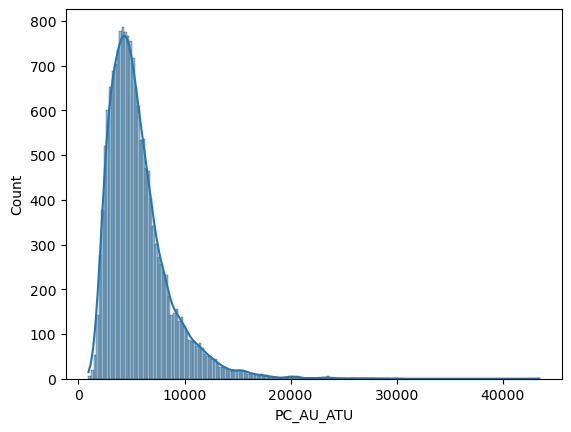

In [105]:
sns.histplot(data=df,x=df[target],kde=True)

<AxesSubplot:xlabel='LogPC_AU_ATU', ylabel='Count'>

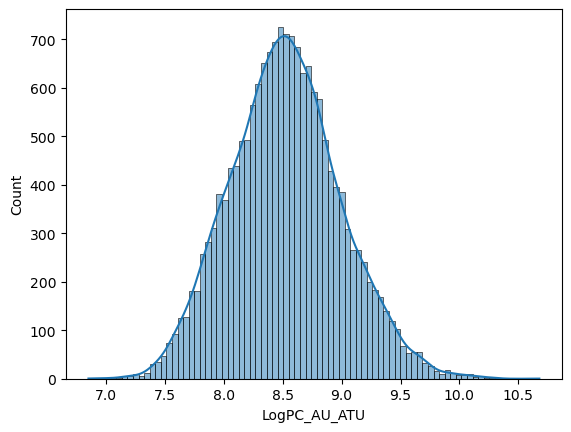

In [106]:
sns.histplot(data=df,x=df['LogPC_AU_ATU'],kde=True)

C:\Users\m2032\AppData\Local\Temp\ipykernel_18404\4173234360.py:40: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))


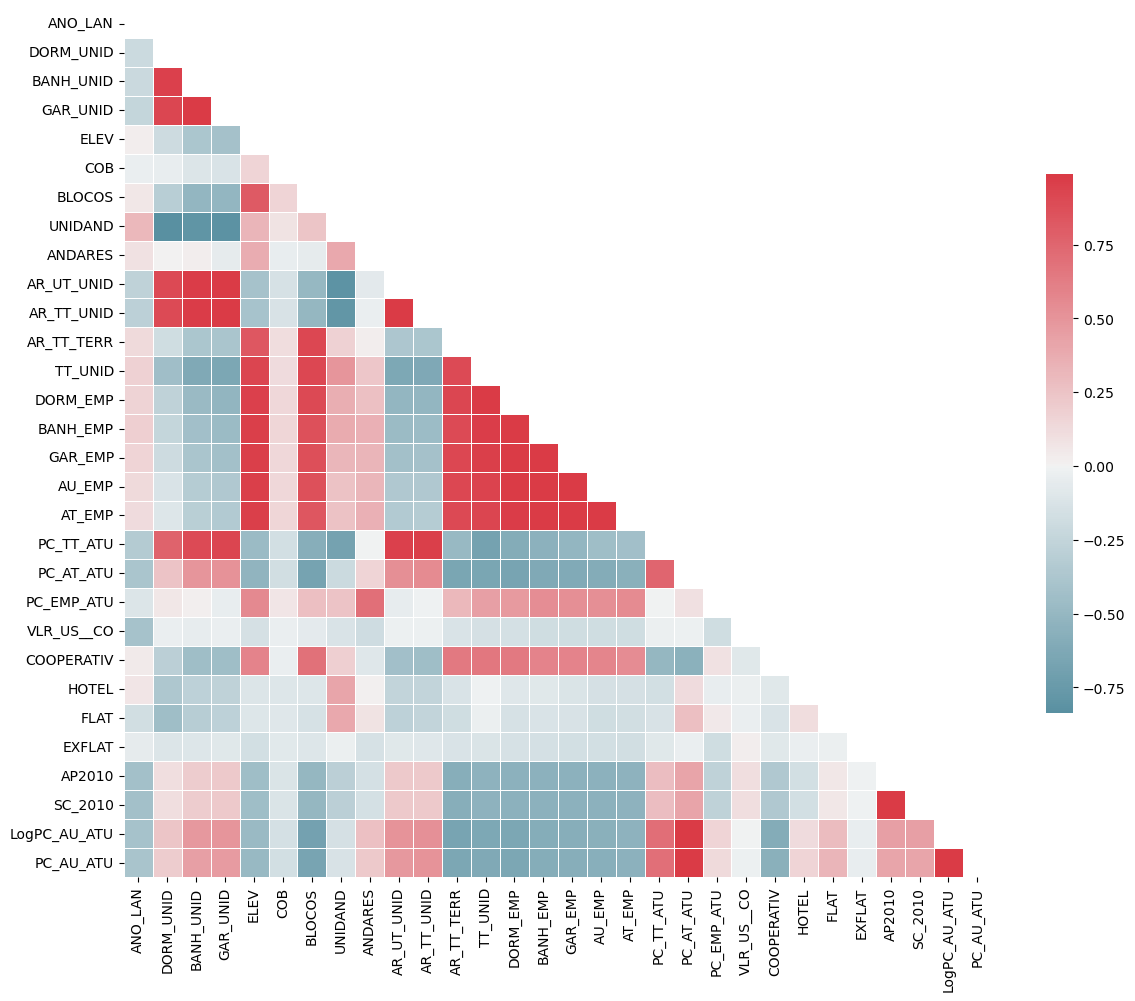

In [107]:
corr_matrix = df[num_vars + [target]].corr()
plot_corr_matrix(corr_matrix)

In [109]:
corr_matrix[target].sort_values(ascending=False)

PC_AU_ATU       1.000000
LogPC_AU_ATU    0.940401
PC_AT_ATU       0.939649
PC_TT_ATU       0.581406
AR_TT_UNID      0.354333
PC_EMP_ATU      0.302372
GAR_UNID        0.299369
AR_UT_UNID      0.299157
ANDARES         0.278804
BANH_UNID       0.270806
FLAT            0.262704
SC_2010         0.210700
AP2010          0.210698
HOTEL           0.176820
UNIDAND         0.135549
DORM_UNID       0.060119
COB             0.034213
ELEV            0.032656
EXFLAT          0.029136
VLR_US__CO      0.013909
AT_EMP         -0.022279
AU_EMP         -0.060844
GAR_EMP        -0.061868
BANH_EMP       -0.078612
COOPERATIV     -0.104511
TT_UNID        -0.126730
AR_TT_TERR     -0.140798
BLOCOS         -0.166825
DORM_EMP       -0.167015
ANO_LAN        -0.171089
Name: PC_AU_ATU, dtype: float64

<AxesSubplot:xlabel='MUNICIPIO', ylabel='PC_AU_ATU'>

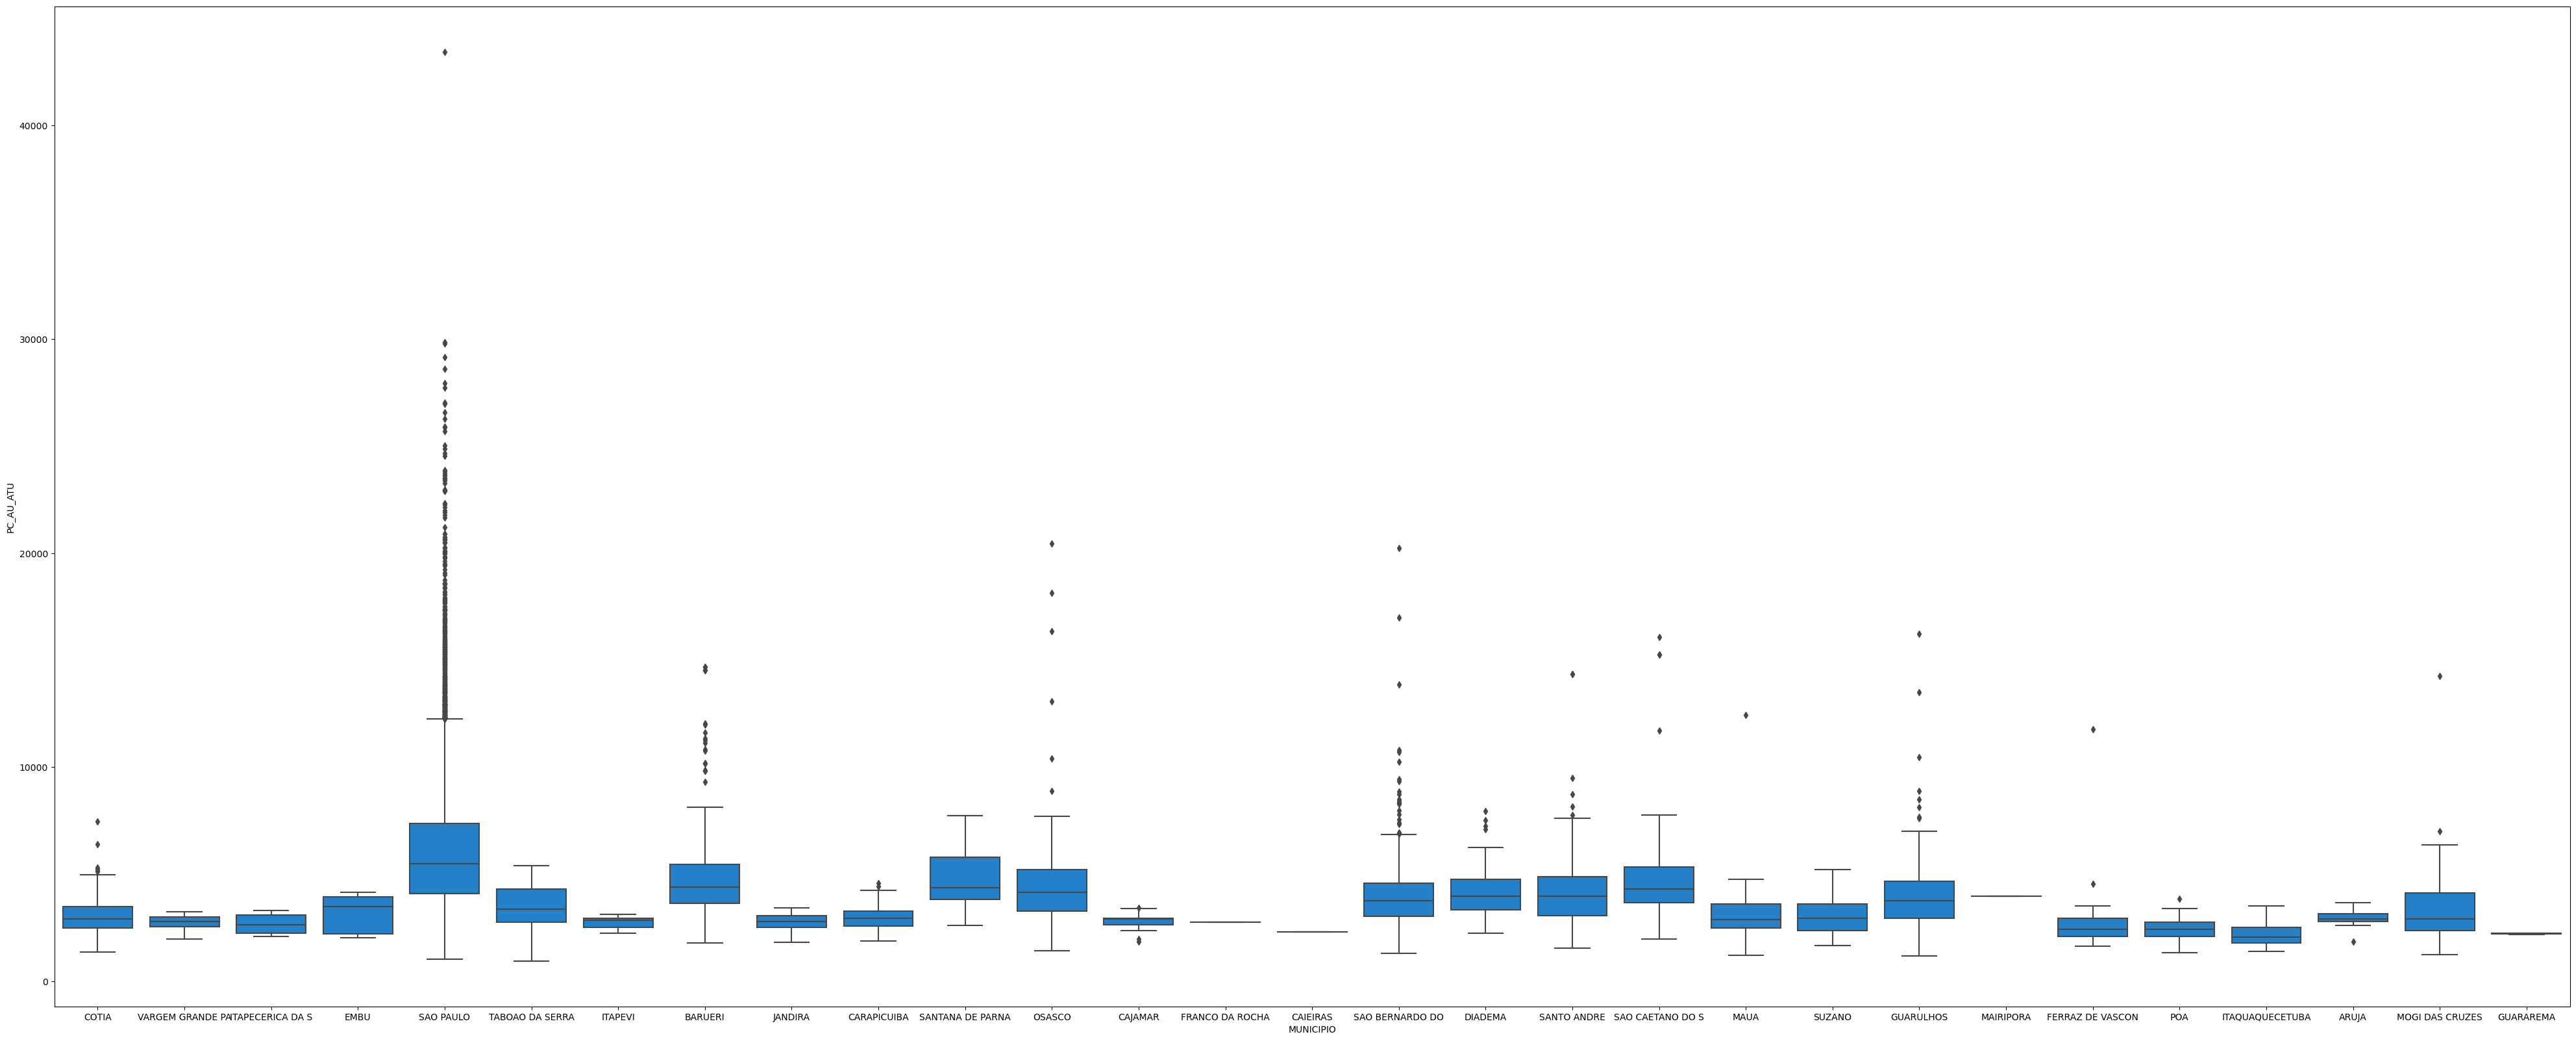

In [99]:
plt.figure(figsize=(50,20))
sns.boxplot(x=df['MUNICIPIO'], y=target, color='#0984e3',data=df)
   


<AxesSubplot:xlabel='TIPO_VIA', ylabel='PC_AU_ATU'>

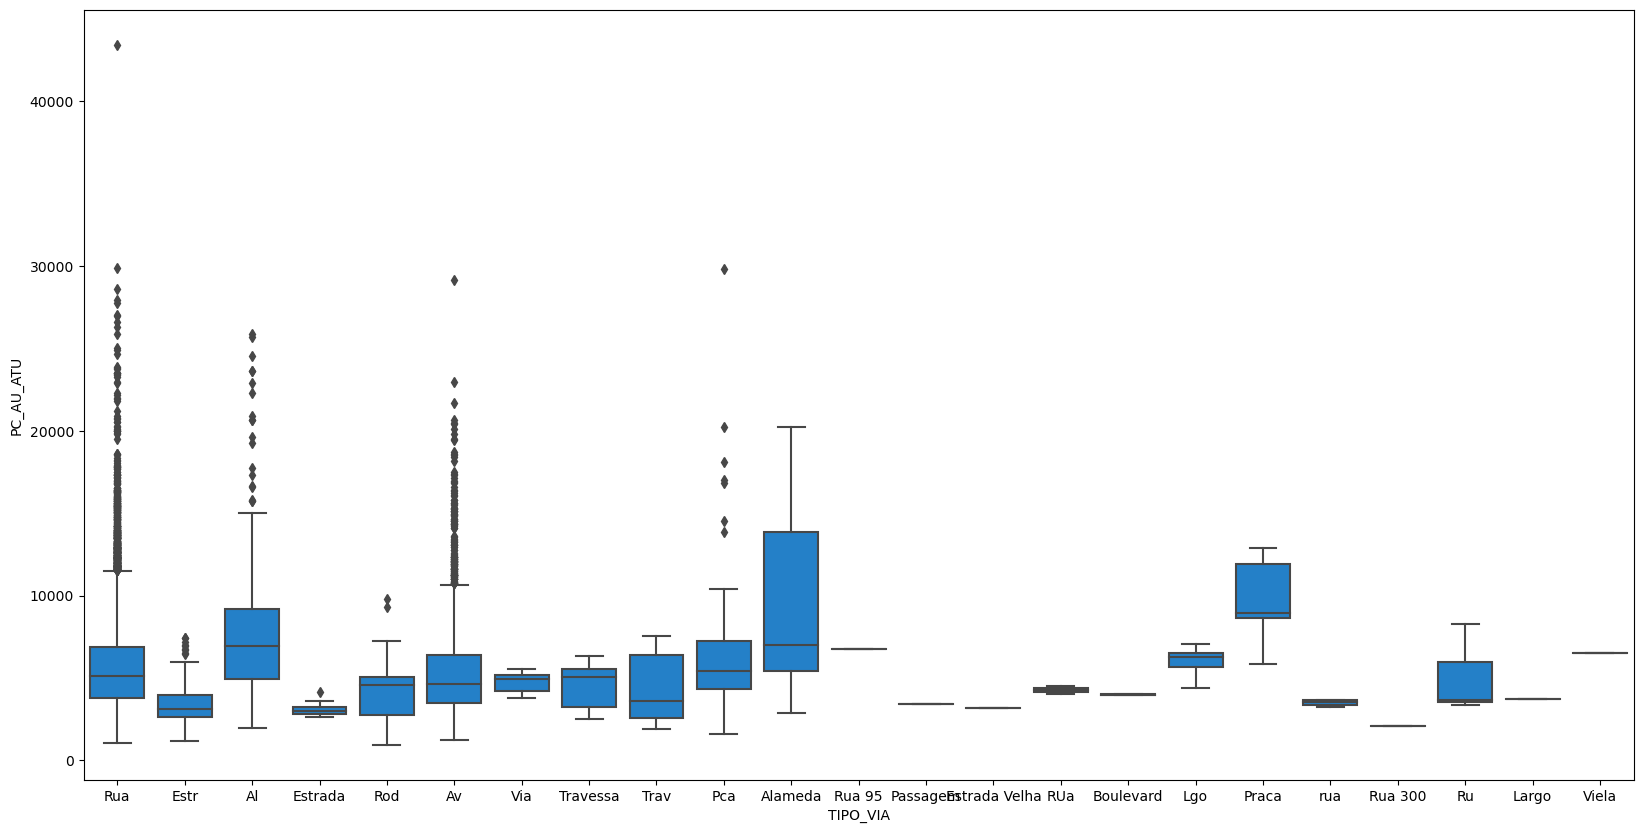

In [100]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['TIPO_VIA'], y=target, color='#0984e3',data=df)


<AxesSubplot:xlabel='SIST_FINAN', ylabel='PC_AU_ATU'>

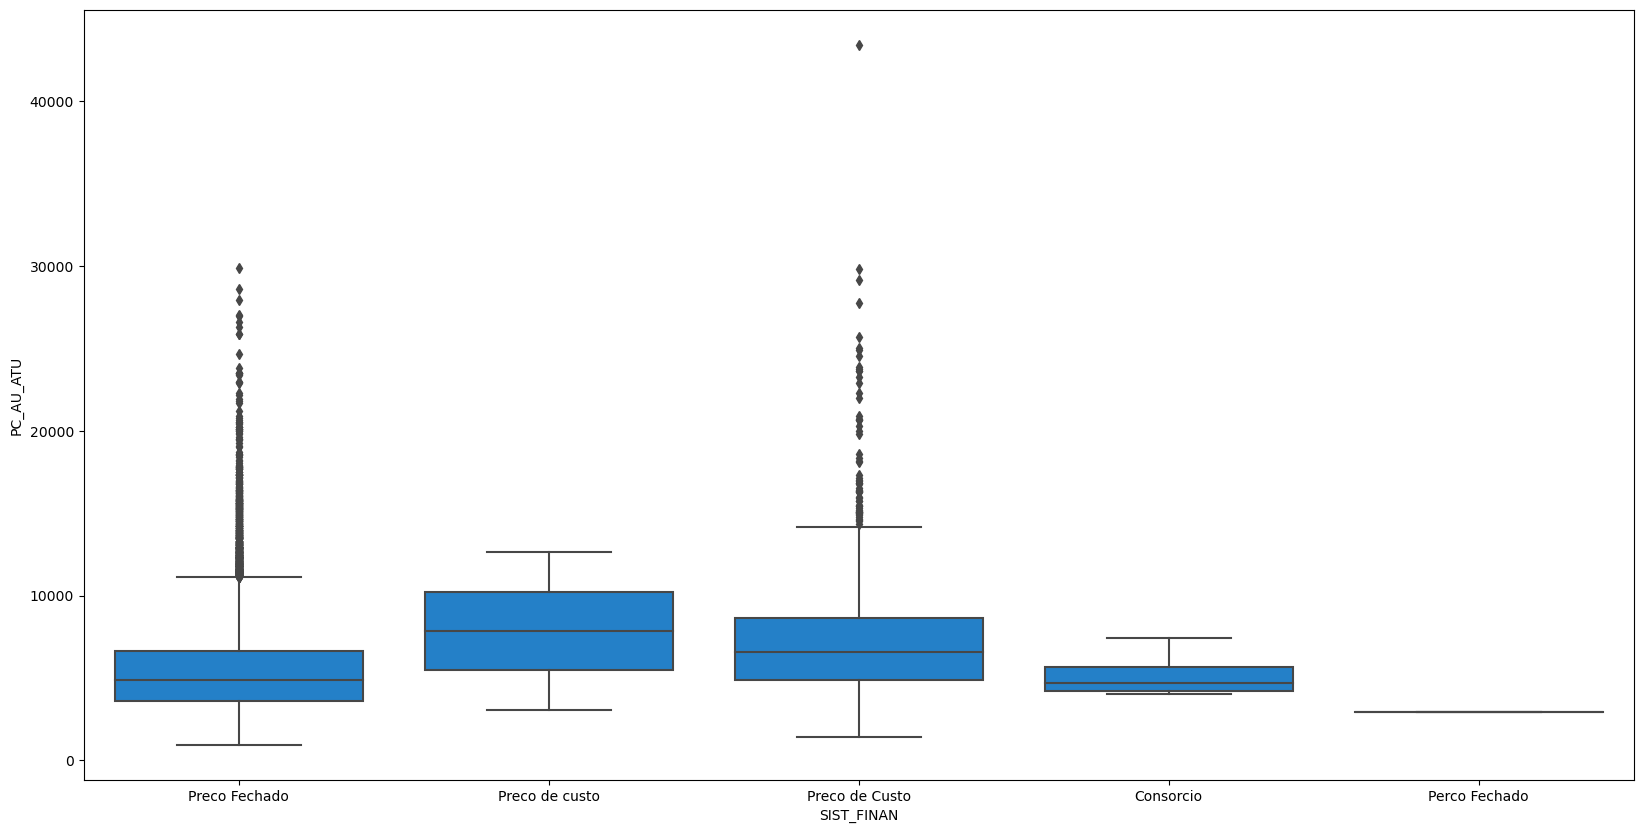

In [101]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['SIST_FINAN'], y=target, color='#0984e3',data=df)